In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

random.seed(1)

# diabetes 데이터

# a) 데이터 로드 및 처리

In [97]:
#데이터 로드

from sklearn import datasets
diabetes = datasets.load_diabetes()

In [98]:
"""
    sklearn에 있는 당뇨병 진행도 데이터를 사용

    <변수>
    Age
    Sex
    Body mass index
    Average blood pressure
    S1 : 혈청에 대한 6가지 지표들
    S2
    S3
    S4
    S5
    S6
    
    * 평균을 빼고 표준편차로 나눈 방식으로 정규화됨

    <데이터>
    diabetes에 data(설명변수), target(종속변수) 데이터가 따로 있음
    
"""

'\n    sklearn에 있는 당뇨병 진행도 데이터를 사용\n\n    <변수>\n    Age\n    Sex\n    Body mass index\n    Average blood pressure\n    S1 : 혈청에 대한 6가지 지표들\n    S2\n    S3\n    S4\n    S5\n    S6\n    \n    *데이터가 각 컬럼의 합이 1이 되도록 centering, scaling됨\n\n    <데이터>\n    diabetes에 data(설명변수), target(종속변수) 데이터가 따로 있음\n'

In [99]:
#설명변수

diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [100]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [101]:
#array형으로 되어있으므로 다루기 쉽게 데이터프레임으로 바꿔준다.

df_x = pd.DataFrame(diabetes.data)
df_x.columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']
df_x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [102]:
#종속변수

df_y = pd.DataFrame(diabetes.target, columns=['target'])
df_y.head()

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [103]:
df = pd.concat([df_x,df_y],axis=1)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [104]:
#442개의 관측치와 10개의 설명변수, 1개의 타겟변수로 구성됨

df.shape

(442, 11)

# b) EDA

In [105]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [106]:
"""
    age: 이산형
    sex: 범주형(명목형)
    bmi: 연속형
    bp:  연속형
    s1~6:연속형
    
"""

'\n    age: 이산형\n    sex: 범주형(명목형)\n    bmi: 연속형\n    bp:  연속형\n    s1~6:연속형\n'

In [107]:
# 이산형 데이터인 age 인코딩

print(max(df['age'].unique()))
print(min(df['age'].unique()))

np.sort(df['age'].unique())

# '나이' 변수인데 음수가 들어있어서 값을 특정 범위로 지정해서 인코딩하기보다 음수/양수로 구분해서 인코딩하는 것이 낫겠다고 생각했다.
# 음수로 표현된 나잇대를 임의로 'A' 타입, 양수로 표현된 나잇대를 임의로 'B' 타입이라고 한다.

0.110726675453815
-0.107225631607358


array([-0.10722563, -0.10359309, -0.09996055, -0.09632802, -0.09269548,
       -0.08906294, -0.0854304 , -0.08179786, -0.07816532, -0.07453279,
       -0.07090025, -0.06726771, -0.06363517, -0.06000263, -0.05637009,
       -0.05273755, -0.04910502, -0.04547248, -0.04183994, -0.0382074 ,
       -0.03457486, -0.03094232, -0.02730979, -0.02367725, -0.02004471,
       -0.01641217, -0.01277963, -0.00914709, -0.00551455, -0.00188202,
        0.00175052,  0.00538306,  0.0090156 ,  0.01264814,  0.01628068,
        0.01991321,  0.02354575,  0.02717829,  0.03081083,  0.03444337,
        0.03807591,  0.04170844,  0.04534098,  0.04897352,  0.05260606,
        0.0562386 ,  0.05987114,  0.06350368,  0.06713621,  0.07076875,
        0.07440129,  0.07803383,  0.08166637,  0.08529891,  0.08893144,
        0.09256398,  0.09619652,  0.11072668])

In [108]:
df.loc[df['age'] < 0, 'A'] = 1
df.loc[df['age'] >= 0, 'A'] = 0
df.loc[df['age'] >= 0, 'B'] = 1
df.loc[df['age'] < 0, 'B'] = 0

In [114]:
df['A'] .head(5)

0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: A, dtype: float64

In [115]:
#명목형 인코딩

s_dummy = pd.get_dummies(df.sex, columns=['sex0','sex1'])
s_dummy.columns=['sex0','sex1']
s_dummy.head()

,sex0,sex1
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [116]:
df.drop(['sex'], axis=1, inplace=True)

In [117]:
df = pd.concat([df, s_dummy],axis=1)
df.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,target,A,B,sex0,sex1
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,0.0,1.0,0,1
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,1.0,0.0,1,0
2,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,0.0,1.0,0,1
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,1.0,0.0,1,0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,0.0,1.0,1,0


In [118]:
df_x = df.drop(['target'],axis=1)
df_y = pd.DataFrame(df['target'],columns=['target'])

In [119]:
print(df_x.columns.values)
print(df_y.columns.values)

['age' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6' 'A' 'B' 'sex0' 'sex1']
['target']


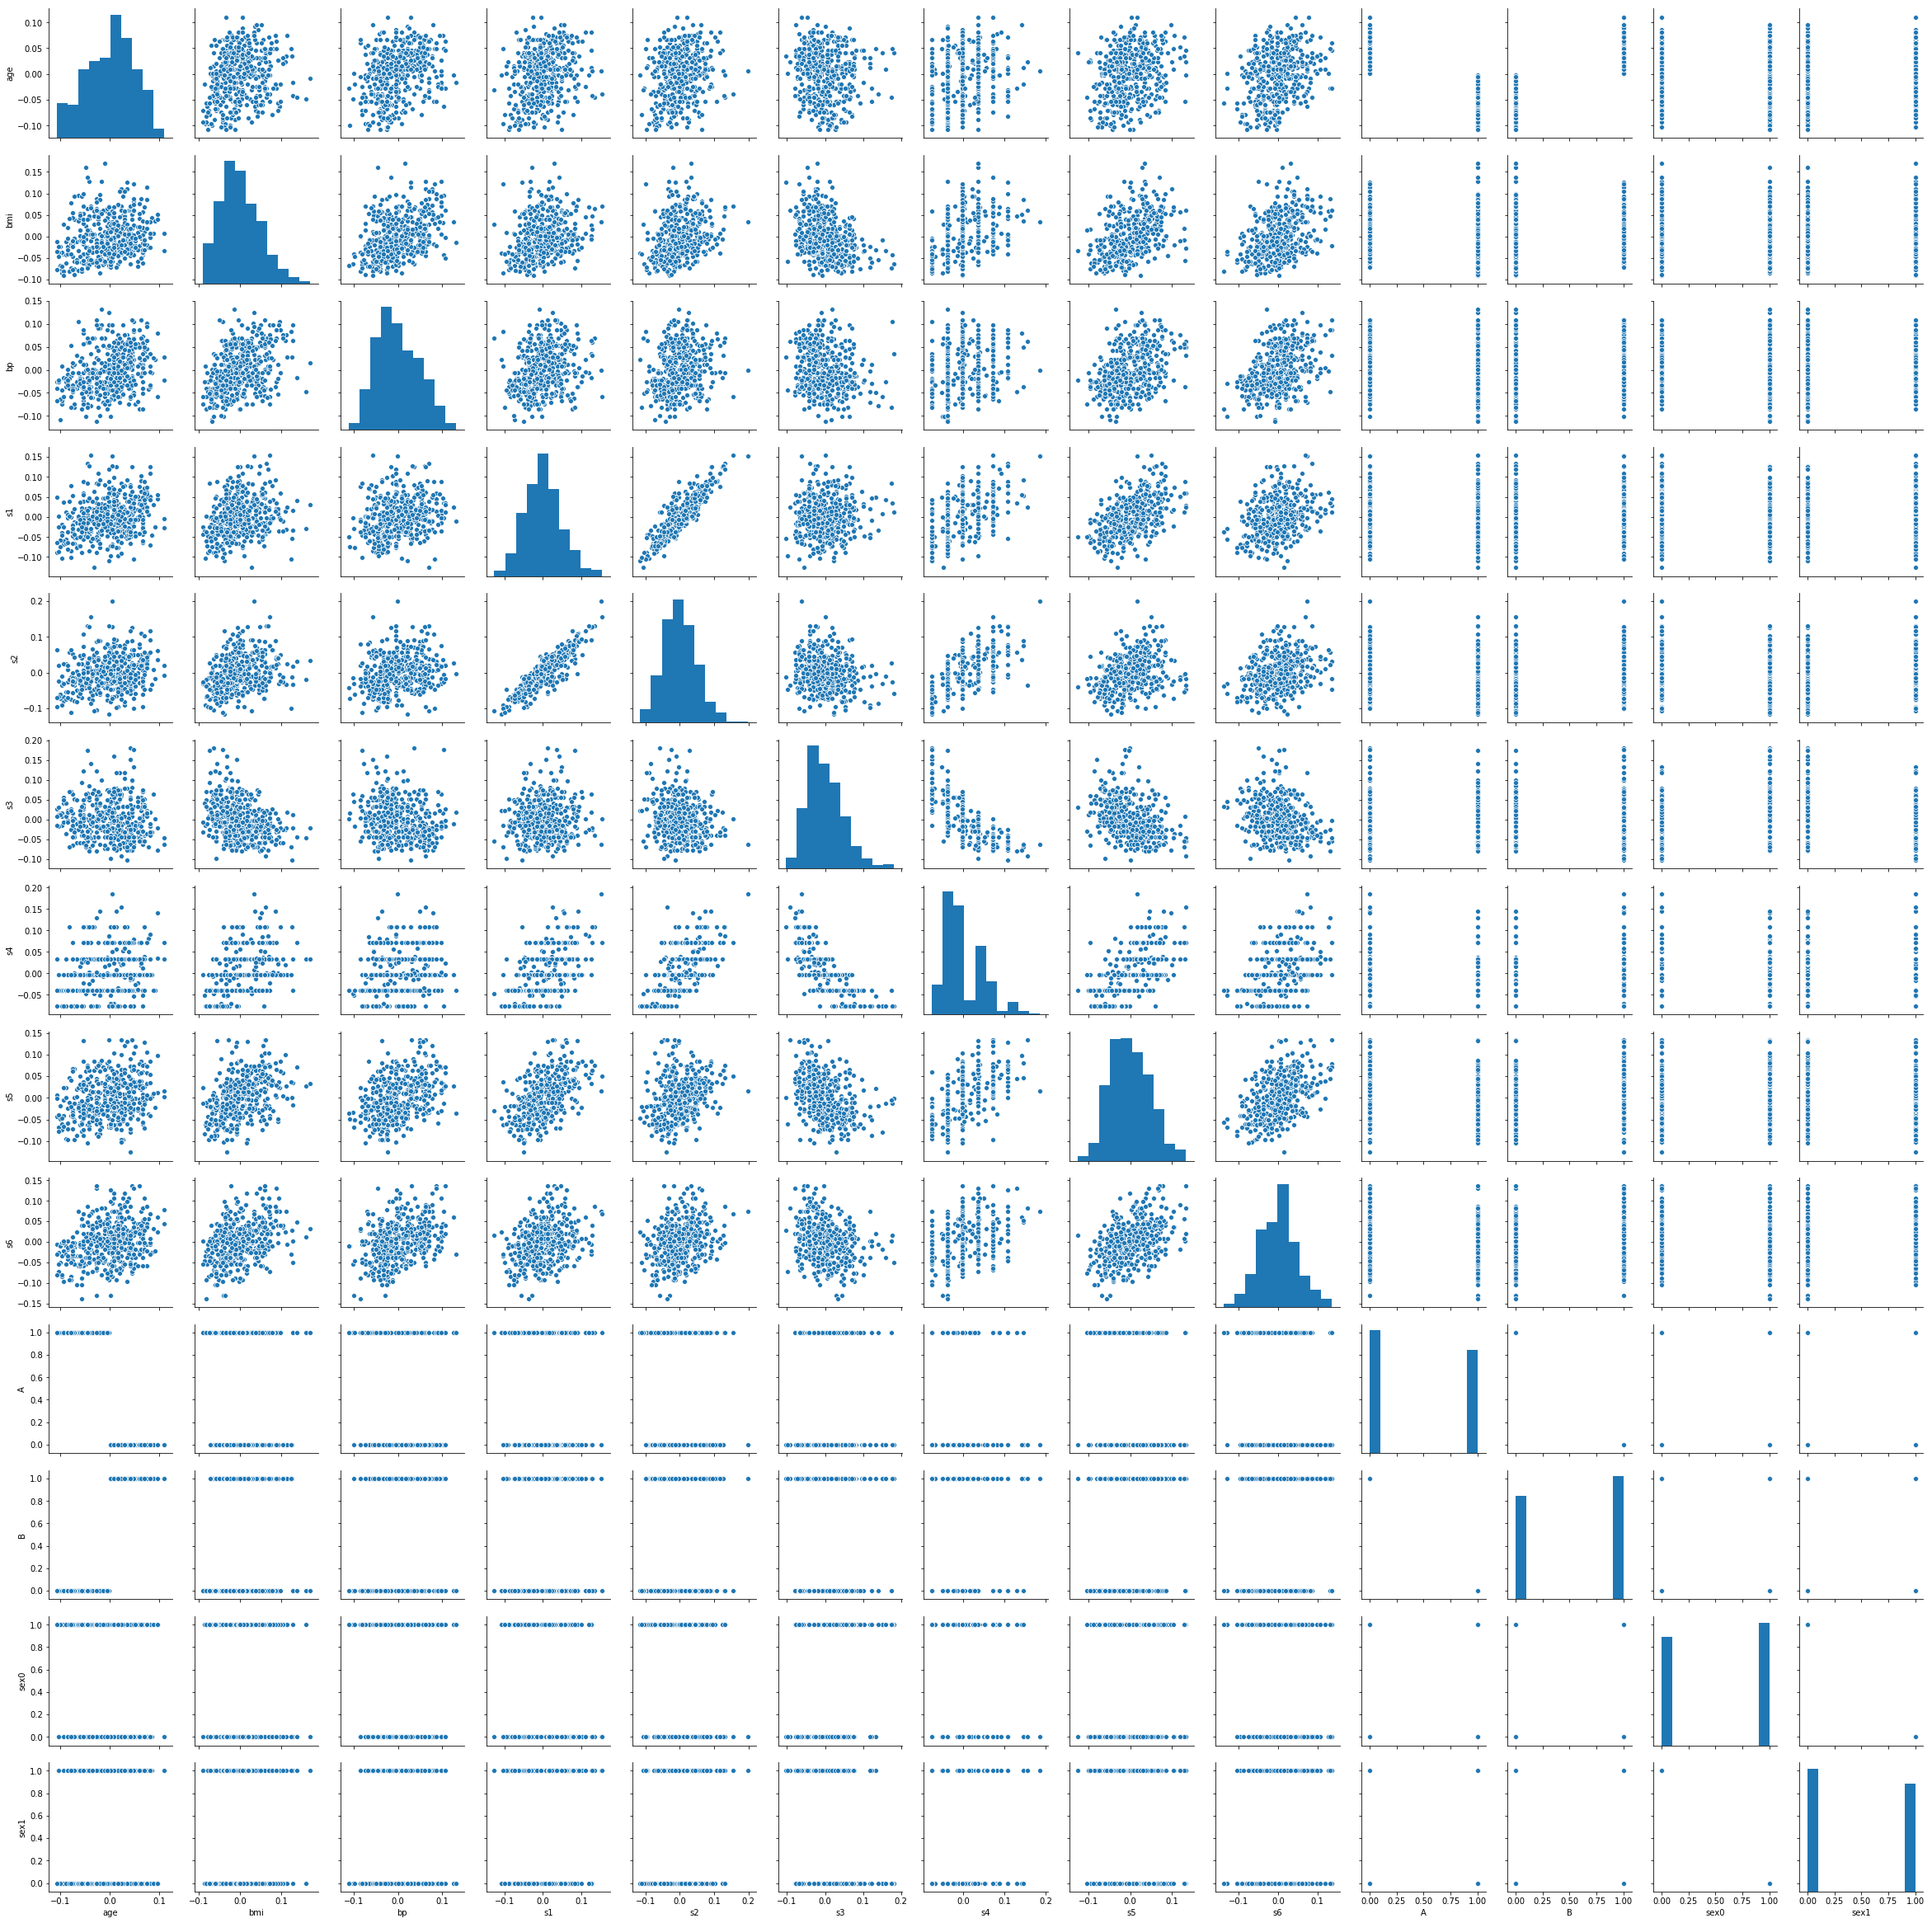

In [120]:
#산점도 행렬
sns.pairplot(df_x)

# s1과 s2의 선형관계가 두드러짐 (다른 s변수들도 살짝 보임)
# s4변수가 이상하게 줄무늬가 보임
# s4변수의 특성으로 특정 구간의 시작(끝)에 많을 수도 있고, 데이터 기입의 오류일 수도 있음

In [121]:
#상관계수 행렬

df_x.corr()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,A,B,sex0,sex1
age,1.000000,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,-0.829196,0.829196,-0.173737,0.173737
bmi,0.185085,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,-0.118670,0.118670,-0.088161,0.088161
bp,0.335427,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,-0.270236,0.270236,-0.241013,0.241013
s1,0.260061,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,-0.165584,0.165584,-0.035277,0.035277
s2,0.219243,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,-0.137409,0.137409,-0.142637,0.142637
s3,-0.075181,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,0.051933,-0.051933,0.379090,-0.379090
s4,0.203841,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,-0.128783,0.128783,-0.332115,0.332115
s5,0.270777,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,-0.187541,0.187541,-0.149918,0.149918
s6,0.301731,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,-0.213792,0.213792,-0.208133,0.208133
A,-0.829196,-0.118670,-0.270236,-0.165584,-0.137409,0.051933,-0.128783,-0.187541,-0.213792,1.000000,-1.000000,0.160206,-0.160206


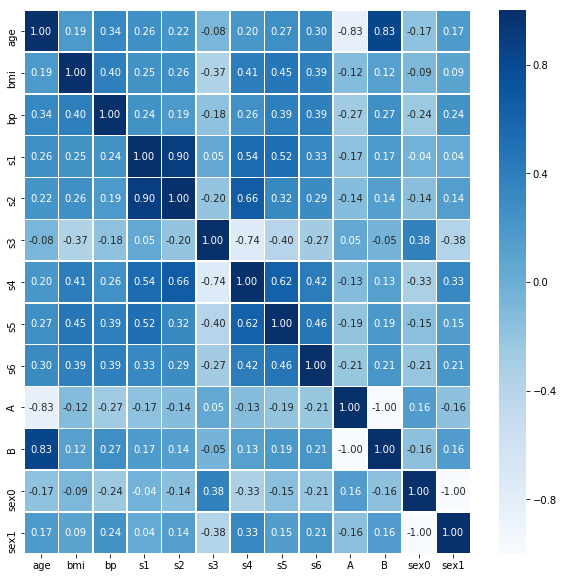

In [122]:
#상관계수 행렬

plt.figure(figsize=(10,10))
sns.heatmap(data = df_x.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [123]:
#VIF 확인
# 상관계수는 두 변수 간의 상관 관계만 측정하므로 다중공선성 진단에 VIF, Condition Index 사용

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df_x.values, i) for i in range(df_x.shape[1])]
vif["features"] = df_x.columns
vif.sort_values(["VIF Factor"], ascending=[False])

#s1, s2, s3, s5의 vif가 10이상이므로 다중공선성이 있다고 판단된다.

C:\Users\john\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
9,inf,A
10,inf,B
11,inf,sex0
12,inf,sex1
3,59.222899,s1
4,39.199654,s2
5,15.402624,s3
7,10.077087,s5
6,8.892847,s4
0,3.533450,age


In [124]:
"""
    다중공선성 의심 변수: s1, s2, s3, s5
    이 변수들을 삭제할 수도 있고, 일부만 제거할 수도 있음
"""

'\n    다중공선성 의심 변수: s1, s2, s3, s5\n    이 변수들을 삭제할 수도 있고, 일부만 제거할 수도 있음\n'

# c) Modeling

In [125]:
# train, test data 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)

In [126]:
from sklearn.linear_model import LinearRegression

#모델 불러옴
model = LinearRegression()
#train data에 fit시킴
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [127]:
#fit된 모델의 R-square
model.score(X_train, y_train)

0.5590521932149087

In [128]:
#MSE
import sklearn as sk
sk.metrics.mean_squared_error(y_train, model.predict(X_train))

2703.3176776322653

In [129]:
print(model.coef_) #추정된 회귀계수(intercept제외)
print(model.intercept_) #intercept

[[-213.92219278  568.0044688   300.78657153 -648.37219296  319.37720928
    26.83162784  174.18144207  729.62042621   50.179055    -10.20658966
    10.20658966   11.68746995  -11.68746995]]
[150.88422202]


In [130]:
#test데이터 예측
model.predict(X_test)

array([[244.16245815],
       [240.8038633 ],
       [165.78185755],
       [111.11887618],
       [180.34282365],
       [252.27530809],
       [119.61262283],
       [186.6724705 ],
       [147.20154063],
       [230.34121584],
       [179.02388194],
       [183.13427238],
       [112.97664306],
       [ 83.68560551],
       [242.07599288],
       [ 90.74025307],
       [155.73375001],
       [ 55.60481555],
       [104.616383  ],
       [222.83092802],
       [189.35137536],
       [151.91597152],
       [160.66114618],
       [164.42675981],
       [200.76070392],
       [174.87987436],
       [121.53128073],
       [ 91.35167051],
       [198.04068049],
       [169.92039998],
       [176.2821715 ],
       [ 75.36041979],
       [147.28291607],
       [154.46682409],
       [143.56105152],
       [203.59257441],
       [159.15308046],
       [192.83263985],
       [134.9308052 ],
       [214.03264761],
       [ 75.19500445],
       [163.23579441],
       [149.73245454],
       [184

In [131]:
#test데이터 R-square
model.score(X_test, y_test)

0.3491031269370287

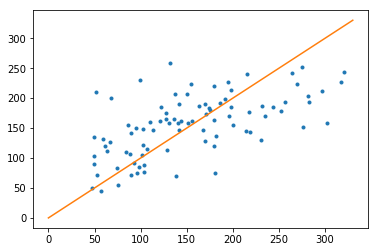

In [132]:
# 예측 vs. 실제데이터 plot
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

In [133]:
"""
    * 이하 화살표 뒤의 수는 age 인코딩 후 바뀐 지표를 의미
    
    MSE: 2738 --> 2703
    train R-square: 0.55 --> 0.56
    test R-square: 0.33 --> 0.35
    
"""

'\n    MSE: 2738\n    train R-square: 0.55\n    test R-square: 0.33\n'

In [134]:
#다중공선성이 제일 큰 변수를 제거하고 다시하기
df2 = df.drop(['s1'],axis=1)
df2.head()

,age,bmi,bp,s2,s3,s4,s5,s6,target,A,B,sex0,sex1
0,0.038076,0.061696,0.021872,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,0.0,1.0,0,1
1,-0.001882,-0.051474,-0.026328,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,1.0,0.0,1,0
2,0.085299,0.044451,-0.005671,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,0.0,1.0,0,1
3,-0.089063,-0.011595,-0.036656,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,1.0,0.0,1,0
4,0.005383,-0.036385,0.021872,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,0.0,1.0,1,0


In [135]:
df2_x = df2.drop(['target'], axis=1)
df2_y = pd.DataFrame(df2['target'],columns=['target'])
df2_x.head()

,age,bmi,bp,s2,s3,s4,s5,s6,A,B,sex0,sex1
0,0.038076,0.061696,0.021872,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,0.0,1.0,0,1
1,-0.001882,-0.051474,-0.026328,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,1.0,0.0,1,0
2,0.085299,0.044451,-0.005671,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,0.0,1.0,0,1
3,-0.089063,-0.011595,-0.036656,0.024991,-0.036038,0.034309,0.022692,-0.009362,1.0,0.0,1,0
4,0.005383,-0.036385,0.021872,0.015596,0.008142,-0.002592,-0.031991,-0.046641,0.0,1.0,1,0


In [136]:
# train, test data 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2_x, df2_y, test_size=0.2, random_state=0)

In [137]:
#모델 불러옴
model = LinearRegression()

#train data에 fit시킴
model.fit(X_train, y_train)

#fit된 모델의 R-square
model.score(X_train, y_train)

0.5562036768178771

In [138]:
#MSE
import sklearn as sk
sk.metrics.mean_squared_error(y_train, model.predict(X_train))

2720.7810703799564

In [139]:
#test데이터 R-square
model.score(X_test, y_test)

0.3408374901652881

In [140]:
"""
    MSE: 2752 --> 2721
    train R-square: 0.55 --> 0.56
    test R-square: 0.32 --> 0.34
"""

'\n    MSE: 2752\n    train R-square: 0.55\n    test R-square: 0.32\n'

In [141]:
"""

    다중공선성이 가장 큰 S1변수를 제거하고 회귀한 결과,
    기존의 MSE, train R-square, test R-square과 거의 비슷하므로
    굳이 이 변수를 사용할 필요가 없다.
    
    하지만 모델의 accuracy를 높이는게 가장 큰 목적이면
    이 변수도 사용해서 정확도를 높이는게 좋다.
    
"""

'\n    다중공선성이 가장 큰 S1변수를 제거하고 회귀한 결과,\n    기존의 MSE, train R-square, test R-square과 거의 비슷하므로\n    굳이 이 변수를 사용할 필요가 없다.\n    \n    하지만 모델의 accuracy를 높이는게 가장 큰 목적이면\n    이 변수도 사용해서 정확도를 높이는게 좋다.\n'

In [142]:
#Ridge, Lasso 회귀
from sklearn.linear_model import Ridge, Lasso

ridge=Ridge(alpha=1.0)
#alpha: 얼마나 정규화를 할건지 정하는 양수 하이퍼파라미터 (클수록 더 정규화)

ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [143]:
ridge.get_params

<bound method BaseEstimator.get_params of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)>

In [144]:
#R-square
ridge.score(X_train,y_train)

0.4741845924898913

In [145]:
#정규화를 덜하니까 R-square가 오히려 증가했다.
ridge=Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
ridge.score(X_train,y_train)

0.5372676823281072

In [146]:
#Lasso
lasso=Lasso(alpha=0.3)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

0.527766242260101

In [147]:
"""
    정규화를 많이하니까 오히려 R-square가 감소했다.
    overfitting의 문제는 아니고, 모델이 단순해서 설명력이 부족한 것같다.
    더 복잡한 모델(다항회귀, DT 등)이 필요해보인다.
"""

'\n    정규화를 많이하니까 오히려 R-square가 감소했다.\n    overfitting의 문제는 아니고, 모델이 단순해서 설명력이 부족한 것같다.\n    더 복잡한 모델(다항회귀, DT 등)이 필요해보인다.\n'

In [ ]:
"""
    <reference>
    https://www.kaggle.com/andyxie/beginner-scikit-learn-linear-regression-tutorial
    
"""